# Maximum Likelihood Fit

We are analyzing a dataset that contains a normally distributed signal and a flat background, measured in 10 equidistant bins of $x$ from 0 to 10 as shown in the figure. The normal distribiution has an (unknown) mean $\mu$ and standard deviation $\sigma$, and we define the signal strength $S$ as the number of all measurements over the full range of $x$, i.e. not restricted to the range of the histogram. The background $B$ shall be described by the average number of entries in a bin of width 1.


30 entries in total


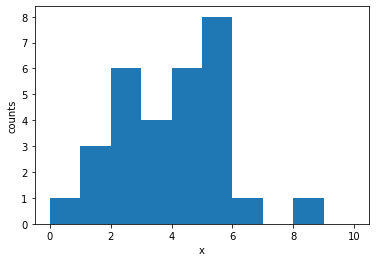

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# histogram data, as retrieved from plt.hist()
hdata = np.array([1, 3, 6, 4, 6, 8, 1, 0, 1, 0])
hbins = np.linspace(0,10,num=11)

print(f"{ int(np.sum(hdata)) } entries in total")

plt.bar(hbins[:-1],hdata,align="edge",width=1)
plt.xlabel("x")
plt.ylabel("counts")
plt.show()

## Pure Background

Calculate the likelihood that this dataset can be described by background only. 

Assume that the bin contents are simply statistical fluctiations around the expected background $B$. Think about the distribution of entries per bin, and calculate for each bin the conditional probability $P(y_i | B)$ of finding the observed number of entries $y_i$ in bin $i$, assuming a background $B$.

Report the likelihood values for all bins for $B=1$ and $B=4$.

In [62]:
plt.style.use("seaborn")
from scipy.stats import poisson

def likelihood_bg_bin(hdata:np.ndarray, B:int):
    return poisson(B).pmf(hdata)

print("Likelihoods per bin for B=1:", likelihood_bg_bin(hdata, B=1))
print("Likelihoods per bin for B=4:", likelihood_bg_bin(hdata, B=4))

Likelihoods per bin for B=1: [3.67879441e-01 6.13132402e-02 5.10943668e-04 1.53283100e-02
 5.10943668e-04 9.12399408e-06 3.67879441e-01 3.67879441e-01
 3.67879441e-01 3.67879441e-01]
Likelihoods per bin for B=4: [0.07326256 0.19536681 0.10419563 0.19536681 0.10419563 0.02977018
 0.07326256 0.01831564 0.07326256 0.01831564]


In [56]:
assert np.all( likelihood_bg_bin(hdata, B=1) > 0.0 )

## Best Fit of Background

Which value of $B$ provides the best fit to the data? What is the likelihood of this most likely scenario in the absence of a signal?

Describe the shape of the likelihood function and discuss the uncertainty.

3.0 2.7202941017470885
[3.] [[0.82222222]]
3.0
6.401108315249227e-12


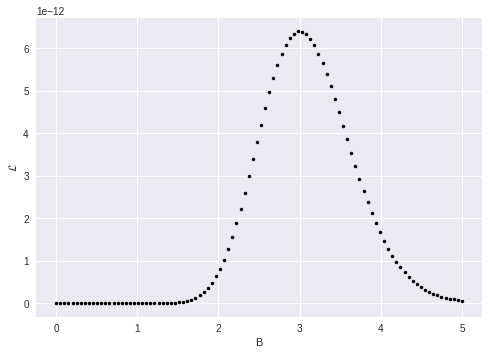

In [66]:
max_likelihood_bg_B = -1 # set to the B value where you find the maximum likelihood
max_likelihood_bg_L = -1 # set to the maximum value of the likelihood

def linear_pdf(x, B):
    return B

print(np.mean(hdata), np.std(hdata))

from scipy.optimize import curve_fit

# bin_centres = np.fromiter((hbins[i] + (hbins[i+1] - hbins[i]) / 2 for i in range(len(hbins)-1)), float)
popt, pcov = curve_fit(lambda x,B: B, hbins[:-1], hdata, p0=[2.0])
print(popt,pcov)
max_likelihood_bg_B = np.mean(hdata)

def likelihood_bkg(x, B):
    distribution = poisson(B)
    return distribution.pmf(x).prod()

max_likelihood_bg_L = likelihood_bkg(hdata, max_likelihood_bg_B)

print(max_likelihood_bg_B)
print(max_likelihood_bg_L)

x = np.linspace(0, 5, 100)
y = [likelihood_bkg(hdata, i) for i in x]
plt.plot(x,y, ".k")
plt.ylabel(r"$\mathcal{L}$")
plt.xlabel("B")
plt.show()
# Ask about the errors

In [63]:
assert max_likelihood_bg_B > 0
assert max_likelihood_bg_L > 0

YOUR ANSWER HERE
Ask about the uncertainty of the 

## Likelihood Function

Implement a function to calculate the likelihood $\mathcal{L}$ for a parameter vector $(S,\mu,\sigma,B)$, given the measurements shown in the histogram. Calculate and report the likelihood for $S=20$, $\mu=5$, $\sigma=2$ and $B=1$.

*Hint: Remember the distribution of entries per bin from the previous question. And how do you best deal with the finite bin width?*

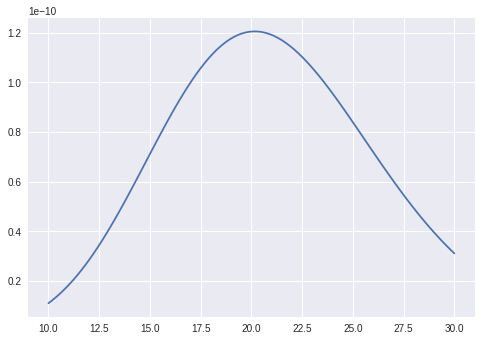

In [68]:
from scipy.stats import norm

def likelihood(hdata, hbins, S, mu, sigma, B):
    lambdas = S * norm.pdf(hbins[:-1], mu, sigma) + B
    
    return np.fromiter((poisson(l).pmf(y) for y,l in zip(hdata,lambdas)), float).prod()

x = np.linspace(10,30,100)
y = np.fromiter((likelihood(hdata, hbins, i, 5,2,1) for i in x), float)
plt.plot(x,y)

In [69]:
# print a likelihood value for testing
print( "Likelihood:", likelihood(hdata,hbins, 20,5,2,1) )
assert likelihood(hdata,hbins, 20,5,2,1) > 0


Likelihood: 1.20569753353604e-10


## Optimization

For which set of fit parameters is the likelihood maximal? What is the value of the likelihood $\mathcal{L}$ at this point?

      fun: 15.593727229121138
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.55271338e-07, -5.79092333e-05,  6.27053968e-05,  5.79092330e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 100
      nit: 18
     njev: 20
   status: 0
  success: True
        x: array([28.86981804,  3.40254369,  1.72125948,  0.14448612])


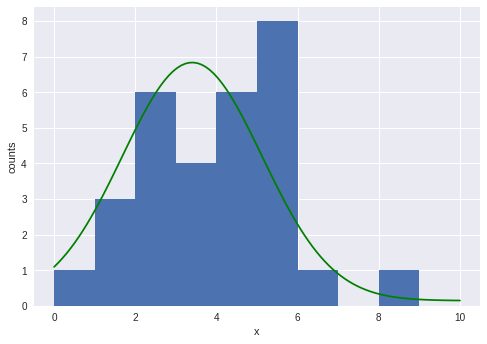

1.6893915285687332e-07


In [137]:
# Set the following variables to the location and value of the maximum likelihood
max_likelihood_sig_S     = -1 # signal strength
max_likelihood_sig_mean  = -1 # mean of normal distribution
max_likelihood_sig_sigma = -1 # std dev of normal distribution
max_likelihood_sig_B     = -1 # background
max_likelihood_sig_L     = -1 # likelihood

from scipy.optimize import minimize

def nll(hdata, hbins, S, mu, sigma, B):
    lambdas = S * norm.pdf(hbins[:-1], mu, sigma) + B
    return np.fromiter((-1*np.log(poisson(l).pmf(y)) for y,l in zip(hdata,lambdas)), float).sum()

def minimize_func(x: np.ndarray):
    return nll(hdata, hbins, *x)

result = minimize(minimize_func, [20, 4, 2, 1], bounds=[(10,50), (0,10), (0.5,20), (0,5)])
print(result)
S, mu, sigma, B = result.x

x = np.linspace(0,10,100)
signal = S*norm.pdf(x, mu, sigma)
y = signal + B
plt.bar(hbins[:-1],hdata,align="edge",width=1)
plt.plot(x, y,"g", label="minimised")
plt.xlabel("x")
plt.ylabel("counts")
plt.show()

max_likelihood_sig_S, max_likelihood_sig_mean, max_likelihood_sig_sigma, max_likelihood_sig_B = result.x
max_likelihood_sig_L = likelihood(hdata, hbins, *result.x)
result.x[0] = result.x[0] + 5

print(max_likelihood_sig_L)

[3.10140937e+01 3.55106315e+00 1.91098855e+00 2.13911260e-14] [[ 3.43493815e+02  5.66395495e-01  1.29945584e+01 -3.17639519e+01]
 [ 5.66395495e-01  1.93910142e-01  1.73580771e-02 -6.48056256e-02]
 [ 1.29945584e+01  1.73580771e-02  6.24139091e-01 -1.18056768e+00]
 [-3.17639519e+01 -6.48056256e-02 -1.18056768e+00  3.31080203e+00]]


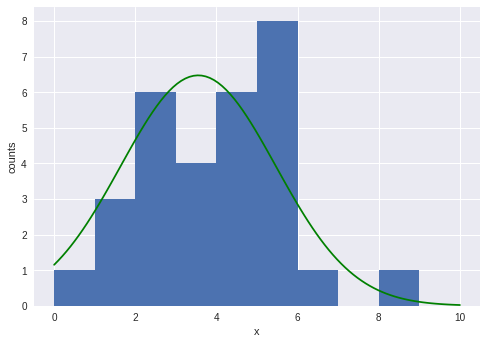

In [140]:
def pdf_func(x, S, mu, sigma, B):
    return S * norm.pdf(x, mu, sigma) + B

popt, pcov = curve_fit(pdf_func, hbins[:-1], hdata, p0=[20, 5, 2, 1], bounds=[0,[50, 10, 20, 10]])
print(popt, pcov)
S, mu, sigma, B = popt
x = np.linspace(0,10,100)
signal = S*norm.pdf(x, mu, sigma)
y = signal + B
plt.bar(hbins[:-1],hdata,align="edge",width=1)
plt.plot(x, y,"g", label="minimised")
plt.xlabel("x")
plt.ylabel("counts")
plt.show()

In [ ]:
assert max_likelihood_sig_S > 1

## Uncertainty

Visualize the likelihood in the neighborhood of the best fit.

Discuss the uncertainty based on your plots of the likelihood. Are the uncertainties Gaussian? Are they correlated or statistically independent?


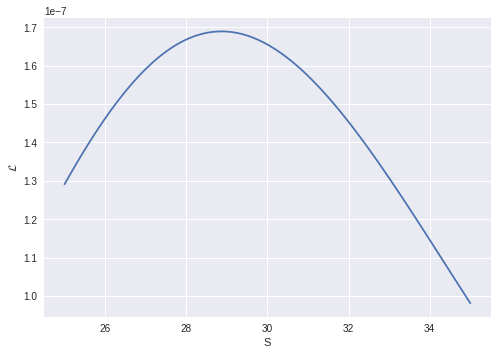

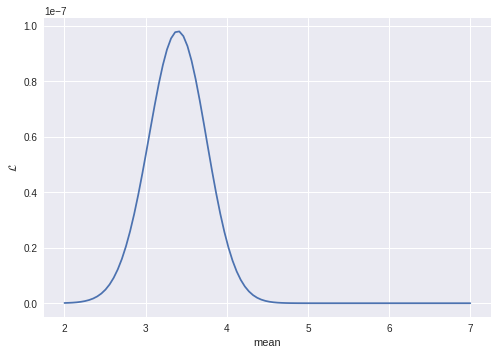

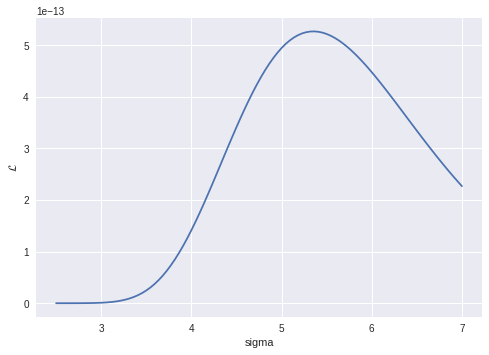

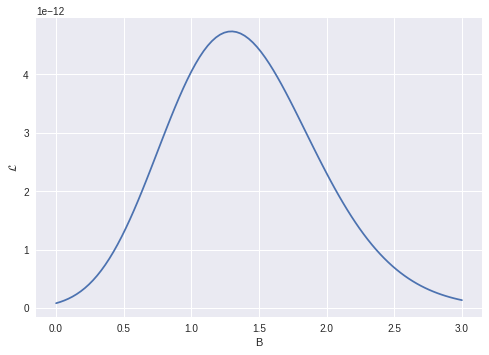

In [139]:
labels = ["S", "mean", "sigma", "B"]
ranges = [[25,35], [2,7], [2.5, 7], [0, 3]]
params = [max_likelihood_sig_S, max_likelihood_sig_mean, max_likelihood_sig_sigma, max_likelihood_sig_B]


for i, (p, r, label) in enumerate(zip(params, ranges, labels)):
    N = 100
    x = np.linspace(r[0], r[1], N)
    new_params = params
    
    y = np.empty(N)
    for x_index, x_value in enumerate(x):
        new_params[i] = x_value
        y[x_index] = likelihood(hdata, hbins, *new_params)
    plt.plot(x,y)
    plt.xlabel(label)
    plt.ylabel(r"$\mathcal{L}$")
    plt.show()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()